In [1]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
features = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\walmarrt\features.csv")

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\walmarrt\stores.csv")

In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\walmarrt\train.csv\train.csv")

In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
features.shape ,stores.shape, train.shape

((8190, 12), (45, 3), (421570, 5))

In [10]:
# we will merge our dataset
train_df = train.merge(features,'left').merge(stores,'left')


In [11]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [12]:
# Train data are too large to process so we can take only sample of it.
train_df = train_df[0:5000]

In [13]:
train_df.shape

(5000, 16)

In [14]:
# Creating a copy of this dataset to generate seasonality trends later
tdf = train_df.copy()

# Data Exploration

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5000 non-null   int64  
 1   Dept          5000 non-null   int64  
 2   Date          5000 non-null   object 
 3   Weekly_Sales  5000 non-null   float64
 4   IsHoliday     5000 non-null   bool   
 5   Temperature   5000 non-null   float64
 6   Fuel_Price    5000 non-null   float64
 7   MarkDown1     1776 non-null   float64
 8   MarkDown2     1462 non-null   float64
 9   MarkDown3     1742 non-null   float64
 10  MarkDown4     1776 non-null   float64
 11  MarkDown5     1776 non-null   float64
 12  CPI           5000 non-null   float64
 13  Unemployment  5000 non-null   float64
 14  Type          5000 non-null   object 
 15  Size          5000 non-null   int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 590.9+ KB


In [16]:
#set date data as index
train_df.set_index('Date',inplace=True)
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-12,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
2010-03-05,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2010-02-05 to 2010-07-23
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5000 non-null   int64  
 1   Dept          5000 non-null   int64  
 2   Weekly_Sales  5000 non-null   float64
 3   IsHoliday     5000 non-null   bool   
 4   Temperature   5000 non-null   float64
 5   Fuel_Price    5000 non-null   float64
 6   MarkDown1     1776 non-null   float64
 7   MarkDown2     1462 non-null   float64
 8   MarkDown3     1742 non-null   float64
 9   MarkDown4     1776 non-null   float64
 10  MarkDown5     1776 non-null   float64
 11  CPI           5000 non-null   float64
 12  Unemployment  5000 non-null   float64
 13  Type          5000 non-null   object 
 14  Size          5000 non-null   int64  
dtypes: bool(1), float64(10), int64(3), object(1)
memory usage: 590.8+ KB


In [18]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,5000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dept,5000.0,18.695600,10.604463,1.000000,9.000000,19.000000,28.000000,37.000000
Weekly_Sales,5000.0,14434.363912,13834.518051,-139.650000,3931.362500,8975.510000,21679.455000,166697.720000
Temperature,5000.0,68.213904,14.201250,35.400000,57.790000,69.640000,80.480000,91.650000
Fuel_Price,5000.0,3.217491,0.426483,2.514000,2.759000,3.290000,3.594000,3.907000
MarkDown1,1776.0,8081.107314,6541.402755,410.310000,4039.390000,6154.140000,10121.970000,34577.060000
MarkDown2,1462.0,2956.496375,7881.740915,0.500000,40.480000,144.870000,1569.000000,46011.380000
MarkDown3,1742.0,1230.846470,7820.487050,0.250000,6.000000,25.965000,101.640000,55805.510000
MarkDown4,1776.0,3740.141408,5950.625029,8.000000,577.140000,1822.550000,3750.590000,32403.870000
MarkDown5,1776.0,5020.192782,3257.215451,554.920000,3127.880000,4325.190000,6222.250000,20475.320000


In [19]:
df1 = train_df.drop(['Type'], axis=1)

In [20]:
## Check correlation between features of data
df1.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,1.000000,-0.641867,-0.001119,-0.000621,-0.010756,0.000084,-0.000110,-0.000040,0.000057,-0.000027,-0.009993,0.006517,NaN
Weekly_Sales,NaN,-0.641867,1.000000,0.022625,-0.031155,-0.008635,0.001601,-0.013974,0.058213,0.004943,0.003109,0.003542,0.008212,NaN
IsHoliday,NaN,-0.001119,0.022625,1.000000,-0.200242,-0.085520,-0.078531,0.425893,0.484886,-0.016925,-0.116042,-0.028354,0.082826,NaN
Temperature,NaN,-0.000621,-0.031155,-0.200242,1.000000,0.229939,0.127257,-0.467112,-0.086643,0.024117,-0.293436,0.119792,-0.183426,NaN
Fuel_Price,NaN,-0.010756,-0.008635,-0.085520,0.229939,1.000000,0.093799,-0.302297,-0.179671,0.011361,-0.236075,0.757229,-0.517506,NaN
MarkDown1,NaN,0.000084,0.001601,-0.078531,0.127257,0.093799,1.000000,-0.014993,-0.171475,0.770587,0.104282,0.022850,-0.064890,NaN
MarkDown2,NaN,-0.000110,-0.013974,0.425893,-0.467112,-0.302297,-0.014993,1.000000,-0.056490,-0.034077,0.039128,-0.310129,0.314690,NaN
MarkDown3,NaN,-0.000040,0.058213,0.484886,-0.086643,-0.179671,-0.171475,-0.056490,1.000000,-0.093412,-0.179999,-0.295630,0.274099,NaN
MarkDown4,NaN,0.000057,0.004943,-0.016925,0.024117,0.011361,0.770587,-0.034077,-0.093412,1.000000,0.094949,-0.007635,-0.055838,NaN


In [21]:
#cheack correlation of other features with weakly sales
df1.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
MarkDown3       0.058213
IsHoliday       0.022625
Unemployment    0.008212
MarkDown4       0.004943
CPI             0.003542
MarkDown5       0.003109
MarkDown1       0.001601
Fuel_Price     -0.008635
MarkDown2      -0.013974
Temperature    -0.031155
Dept           -0.641867
Store                NaN
Size                 NaN
Name: Weekly_Sales, dtype: float64

# Data Cleaning 

In [22]:
#check for missiong values
train_df.isnull().sum()

Store              0
Dept               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       3224
MarkDown2       3538
MarkDown3       3258
MarkDown4       3224
MarkDown5       3224
CPI                0
Unemployment       0
Type               0
Size               0
dtype: int64

In [23]:
train_df = train_df.fillna(0)

In [24]:
train_df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

# Data Visualization

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

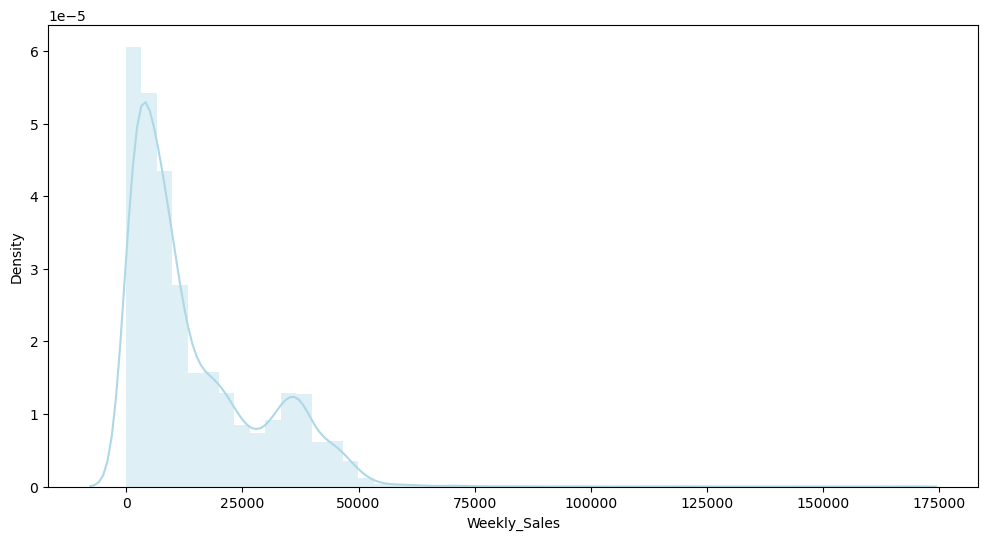

In [25]:
#Lets check distribution of dependent feature
plt.figure(figsize=(12,6))
sns.distplot(train_df['Weekly_Sales'], bins=50,color='lightblue')

In [26]:
# Lets separate numerical data aside
df_numeric = train_df.select_dtypes(exclude = ["object","bool"])

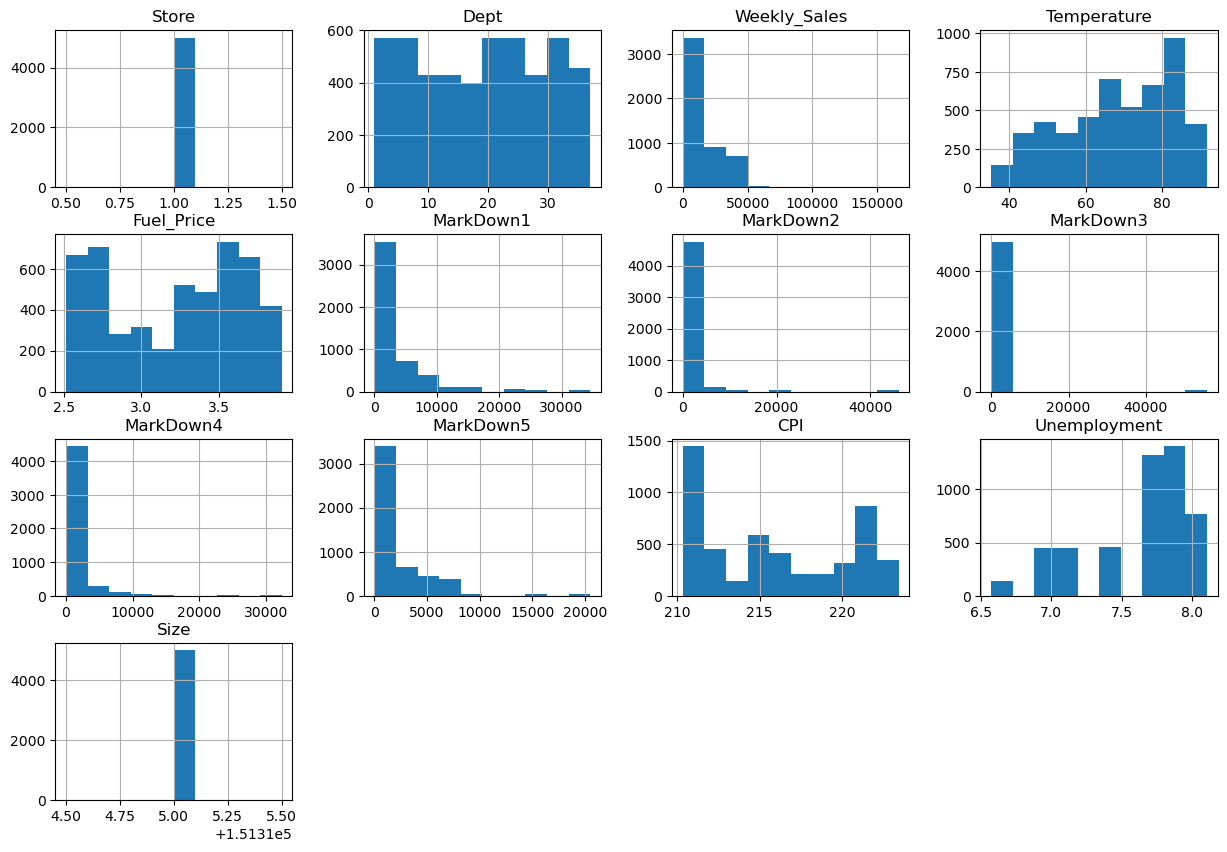

In [27]:
df_numeric.hist(figsize=(15,10))
plt.show()

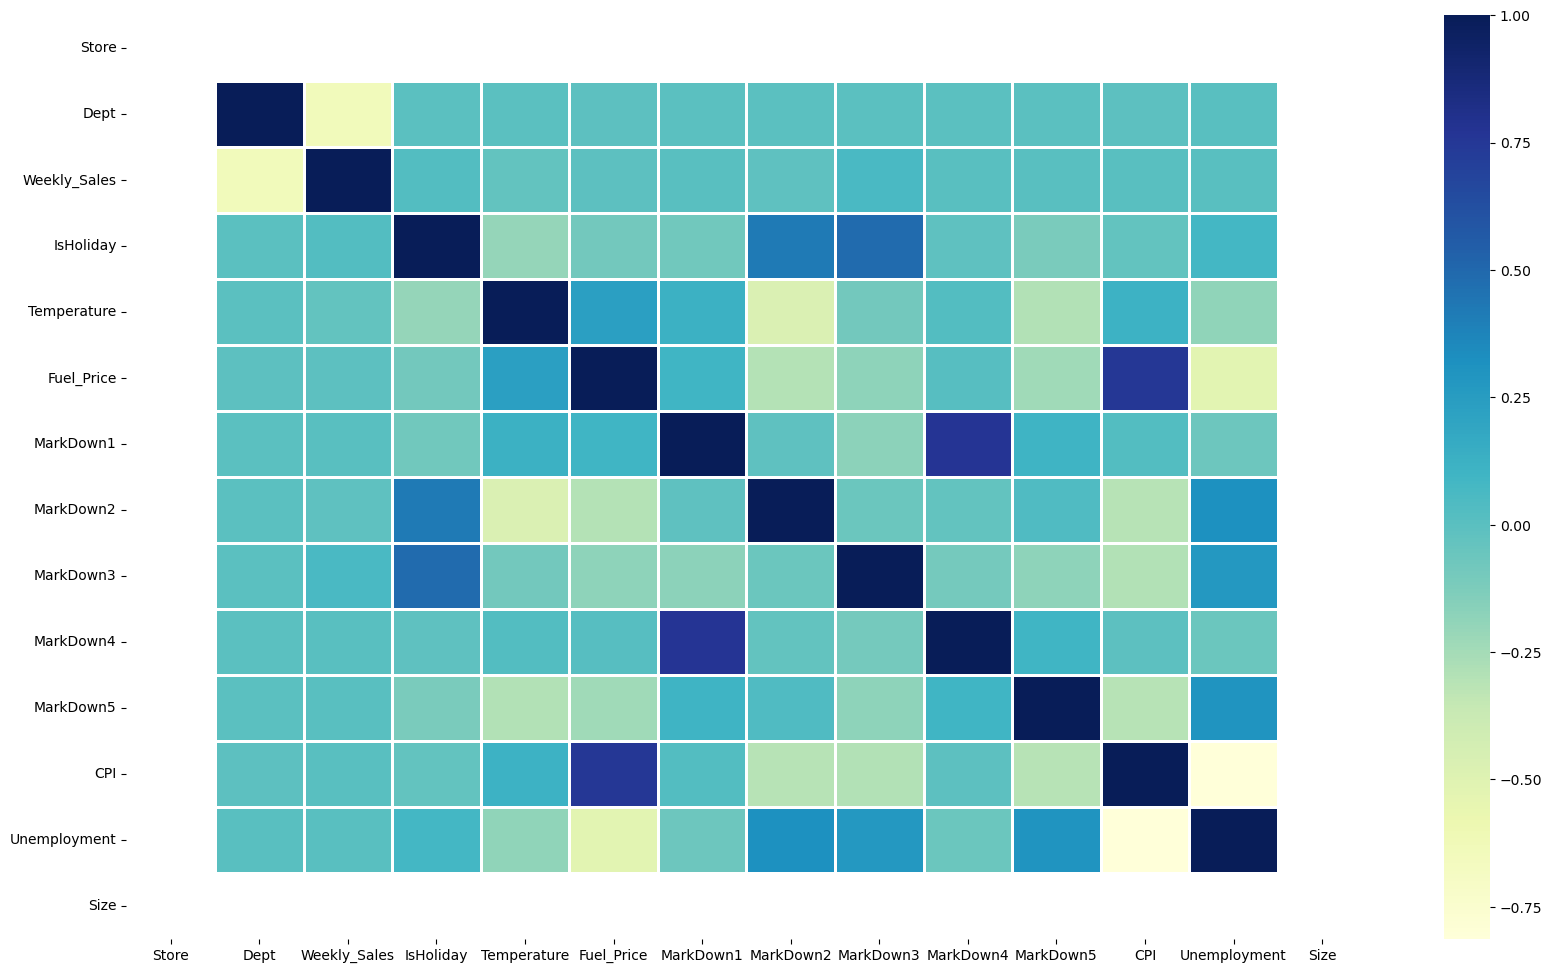

In [28]:
# Plot heatmap of correlation between features
plt.figure(figsize=(20,12))

sns.heatmap(df1.corr(), linewidths=1, annot=True,fmt='.2g', cmap="YlGnBu")

plt.show()

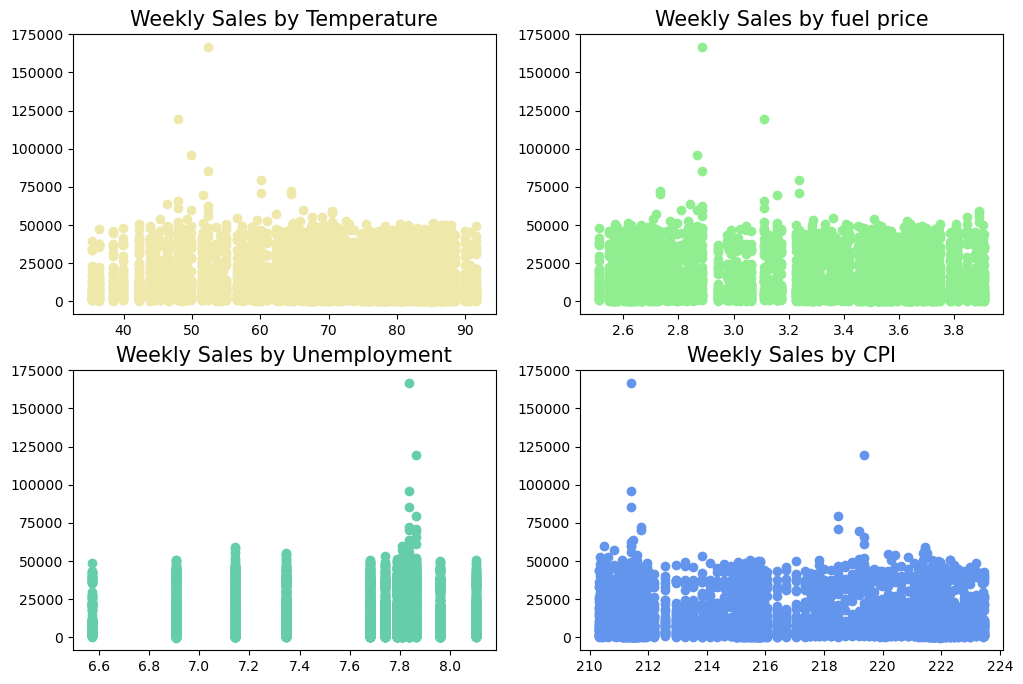

In [29]:
# visualising Sales by various features
fig, ax = plt.subplots(2, 2, figsize= (12,8))
ax[0,0].scatter(train_df['Temperature'], train_df['Weekly_Sales'],color='palegoldenrod')
ax[0,0].set_title('Weekly Sales by Temperature',fontsize=15)

ax[0,1].scatter(train_df['Fuel_Price'], train_df['Weekly_Sales'],color='lightgreen')
ax[0,1].set_title('Weekly Sales by fuel price',fontsize=15)

ax[1,0].scatter(train_df['Unemployment'], train_df['Weekly_Sales'],color='mediumaquamarine')
ax[1,0].set_title('Weekly Sales by Unemployment',fontsize=15)

ax[1,1].scatter(train_df['CPI'], train_df['Weekly_Sales'], color='cornflowerblue')
ax[1,1].set_title('Weekly Sales by CPI',fontsize=15)
plt.show()

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

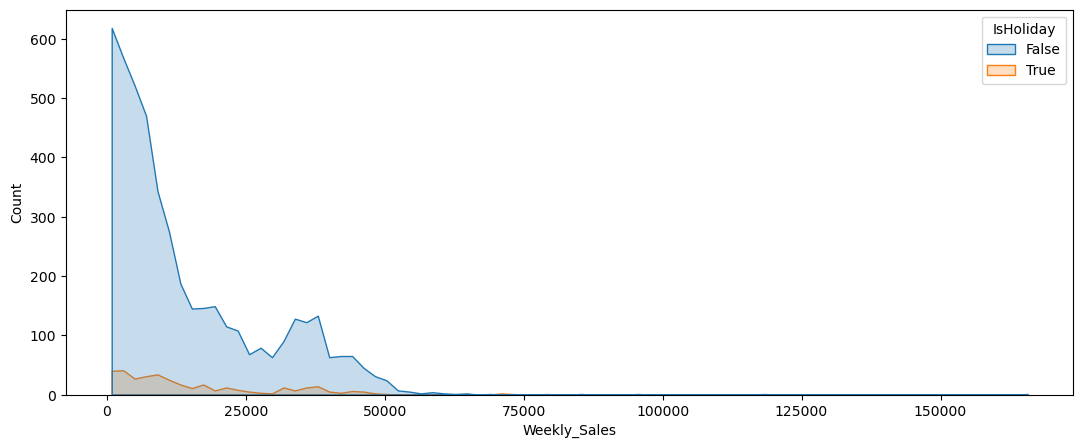

In [30]:
plt.figure(figsize=(13,5))
sns.histplot(train_df, x="Weekly_Sales" , hue="IsHoliday", element='poly')

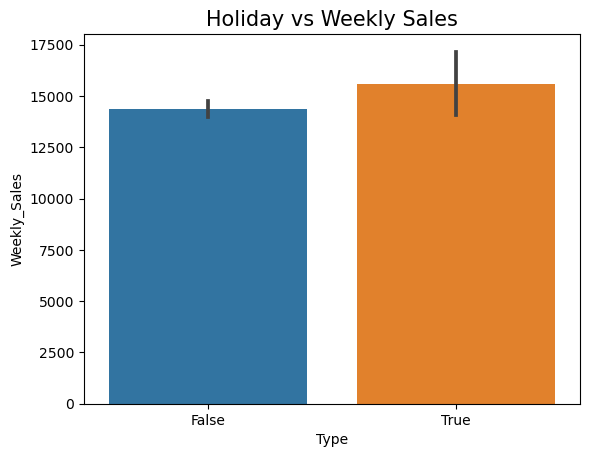

In [31]:
sns.barplot(x="IsHoliday", y= "Weekly_Sales",data =train_df)
plt.title("Holiday vs Weekly Sales", fontsize=15)
plt.xlabel("Type")
plt.ylabel=("Weekly Sales")
plt.show()

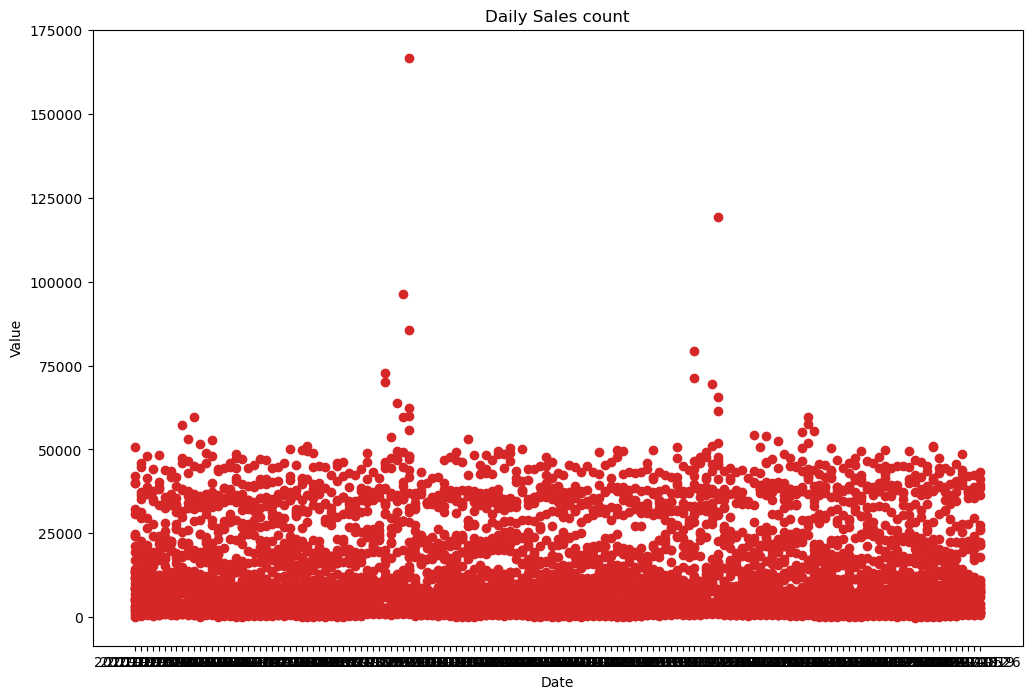

In [32]:
def plot_df(train_df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,8), dpi=dpi)
    plt.scatter(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_df, x=train_df.index, y=train_df['Weekly_Sales'], title='Daily Sales count') 

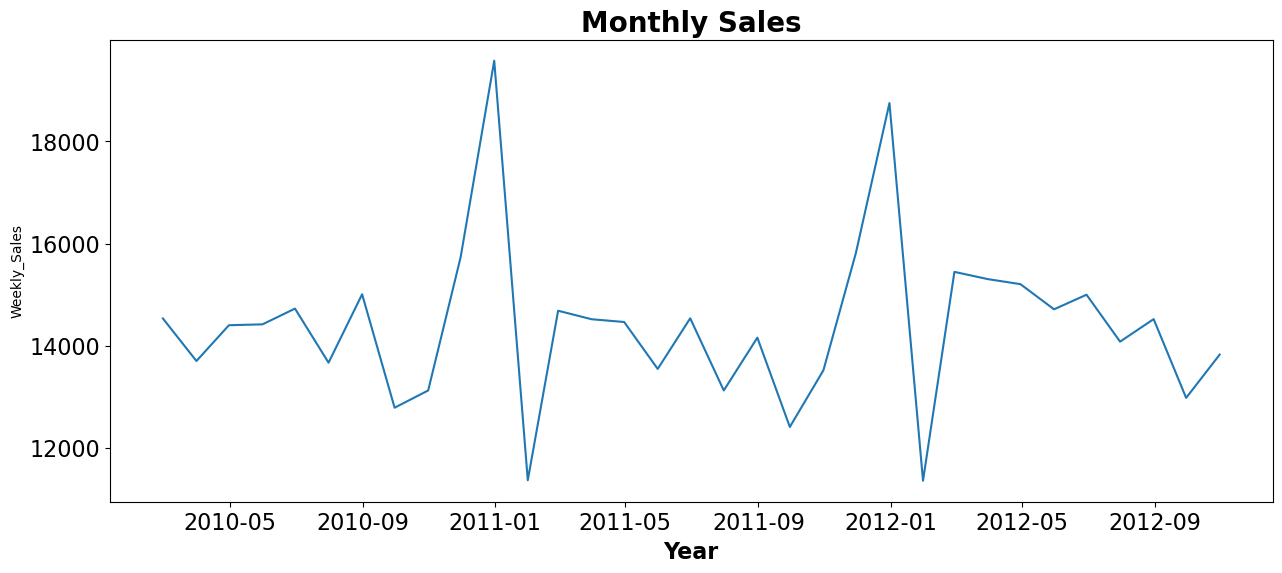

In [33]:
# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date', 'Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
y['Date'] = y.index

# Plot the Monthly Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=y, ax=ax)

ax.set_title('Monthly Sales', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)


# Time Series Analysis

### check stationarity of Time Series

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
# check for stationarity
def adf_test(series, title=''):
  
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series,autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
    
        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")   


In [36]:
adf_test(train_df['Weekly_Sales'], title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic        -3.992873
p-value                    0.001448
# lags used               24.000000
# observations          4975.000000
critical value (1%)       -3.431665
critical value (5%)       -2.862121
critical value (10%)      -2.567079
Rejects the null hypothesis
Data has no unit root and is stationary


#### After running ADF Test, we can come to conclusion that our data is Stationary, so there's no need of conversion.

#### ~ Visualize the stationary data with rolling mean and standard deviation 

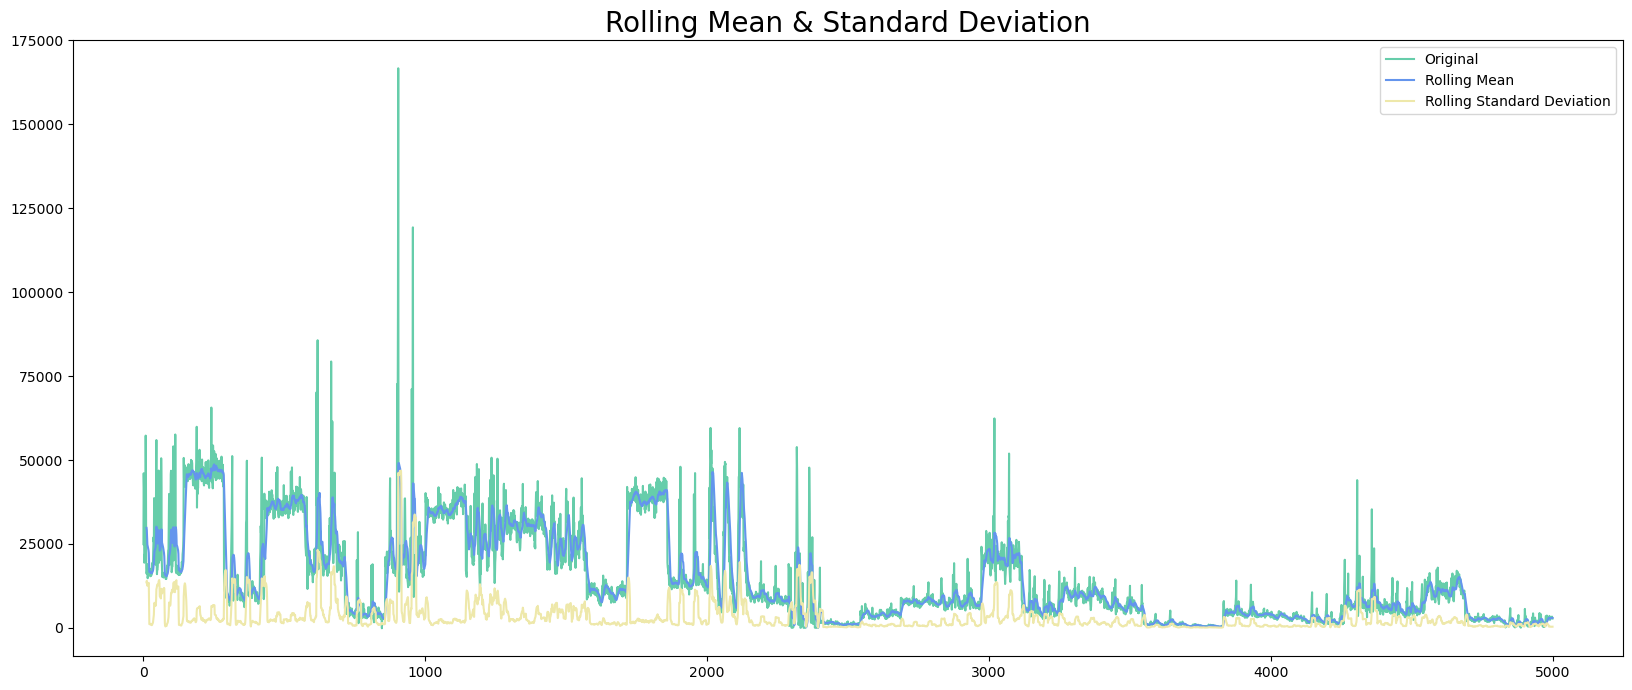

In [37]:
rolmean = tdf['Weekly_Sales'].rolling(12).mean()
rolstd = tdf['Weekly_Sales'].rolling(12).std()

# plot rolling statistics
plt.figure(figsize=(20,8))
orig = plt.plot(tdf['Weekly_Sales'], color='mediumaquamarine', label='Original')
mean = plt.plot(rolmean, color = 'cornflowerblue', label='Rolling Mean')
std = plt.plot(rolstd, color='palegoldenrod', label='Rolling Standard Deviation')
plt.legend()
plt.title('Rolling Mean & Standard Deviation',fontsize=20)
plt.show()

### Autocorrelation & Partial Autocorrelation

[1.         0.92854796 0.88679107 0.8607605  0.85075685 0.81673825
 0.8051082  0.80343649 0.79463531 0.78223623 0.77063413 0.76217978
 0.75287623 0.7429716  0.73713673 0.73430133 0.72901869 0.72235165
 0.71468405 0.70797611 0.70312939 0.69629597 0.69704528 0.69788572
 0.69994803 0.69893157 0.69818041 0.69266522 0.68988875 0.68392913
 0.67630012 0.66678423 0.66412563 0.66218936 0.66267176 0.66225265
 0.66027067 0.66066929 0.65876502 0.65770365 0.65742307 0.6593714
 0.6632734  0.67071944 0.67545859 0.67597077 0.673255   0.66869051
 0.68204044 0.67970257 0.68680428 0.69537671 0.71978512 0.69540742
 0.6743498  0.66069084 0.64883517 0.63015195 0.6205455  0.61877026
 0.61375738]


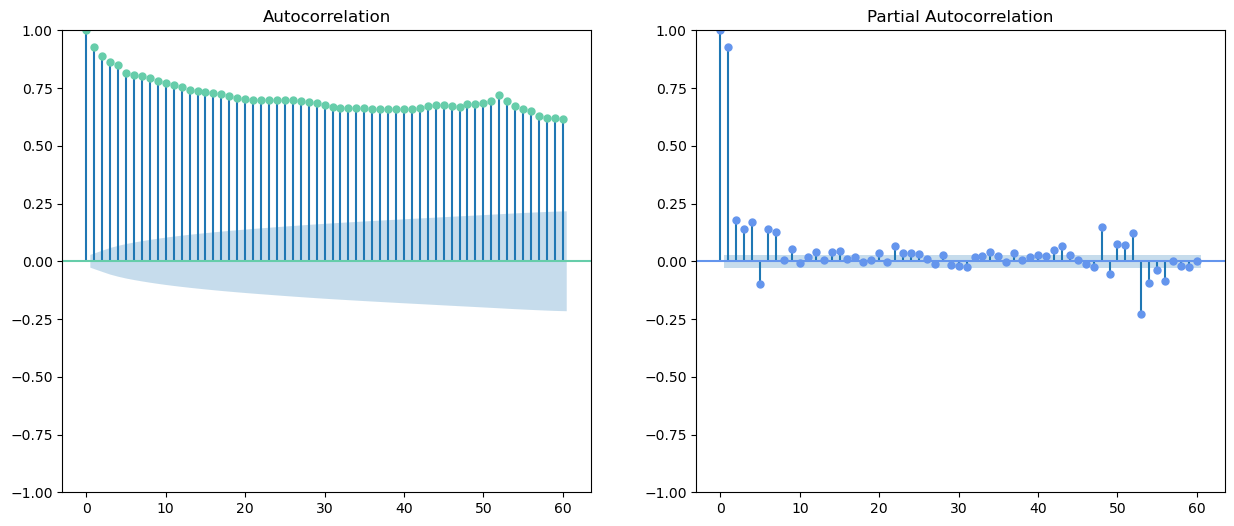

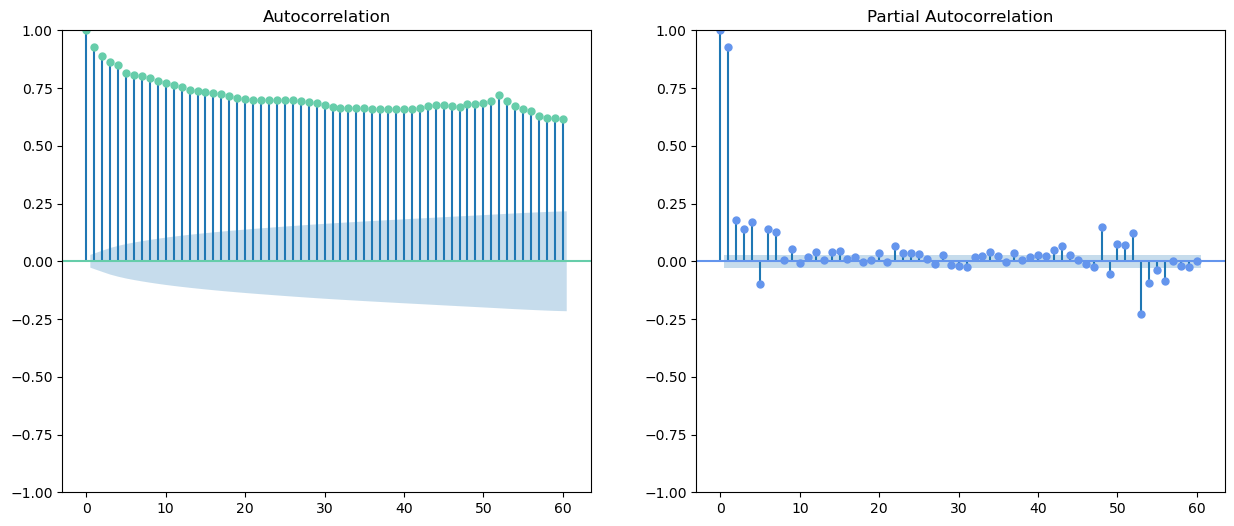

In [38]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(train_df['Weekly_Sales'], nlags=60, fft=False)
print(autocorr)

plot_acf(train_df['Weekly_Sales'].tolist(), lags=60, ax=ax[0], fft=False, color='mediumaquamarine');
plot_pacf(train_df['Weekly_Sales'].tolist(), lags=60, ax=ax[1], color='cornflowerblue')

#### Autocorrelation measures the linear relationship between lagged values of a time series.
#### Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable that affect both variables.#### 

## Lag Scatter plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

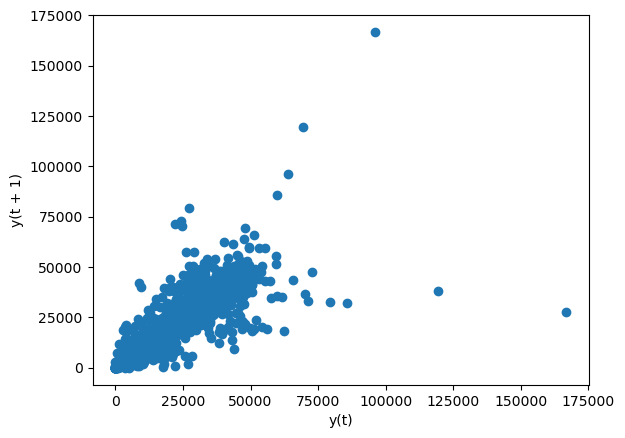

In [39]:
from pandas.plotting import lag_plot
lag_plot(train_df['Weekly_Sales'])

#### ~~We have positive Correlation in dependent feature.

### Difference in time series

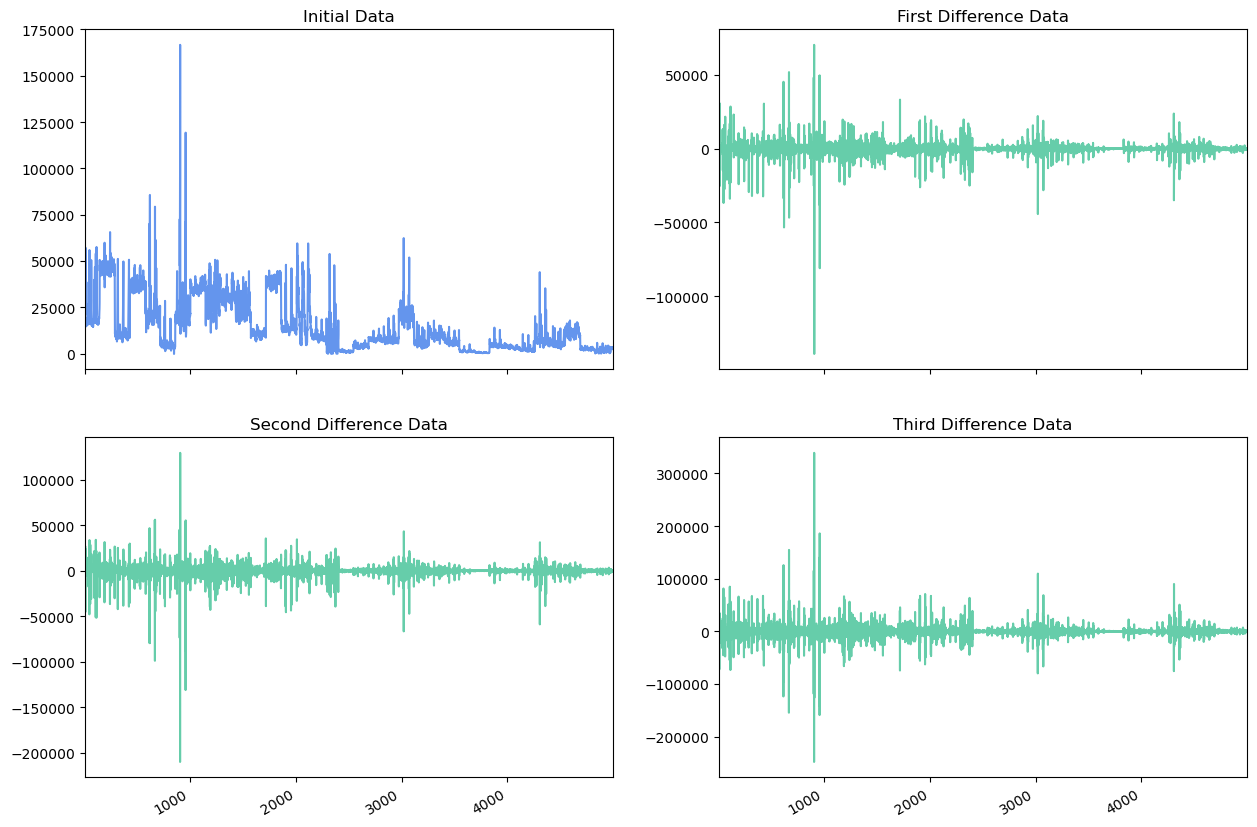

In [40]:
from statsmodels.tsa.statespace.tools import diff

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))
# Set the differences from the initial data
tdf['OpenDiff1'] = diff(tdf['Weekly_Sales'],k_diff=1)
tdf['OpenDiff2'] = diff(tdf['Weekly_Sales'],k_diff=2)
tdf['OpenDiff3'] = diff(tdf['Weekly_Sales'],k_diff=3)

# Plot the initial data and as well as Differences in initial data
tdf['Weekly_Sales'].plot(title="Initial Data",ax=ax[0][0], color='cornflowerblue').autoscale(axis='x',tight=True);
tdf['OpenDiff1'].plot(title="First Difference Data",ax=ax[0][1],color='mediumaquamarine').autoscale(axis='x',tight=True);
tdf['OpenDiff2'].plot(title="Second Difference Data",ax=ax[1][0],color='mediumaquamarine').autoscale(axis='x',tight=True);
tdf['OpenDiff3'].plot(title="Third Difference Data",ax=ax[1][1],color='mediumaquamarine').autoscale(axis='x',tight=True);

fig.autofmt_xdate()

### Time series Components

Text(0.5, 0.98, 'Open decomposition')

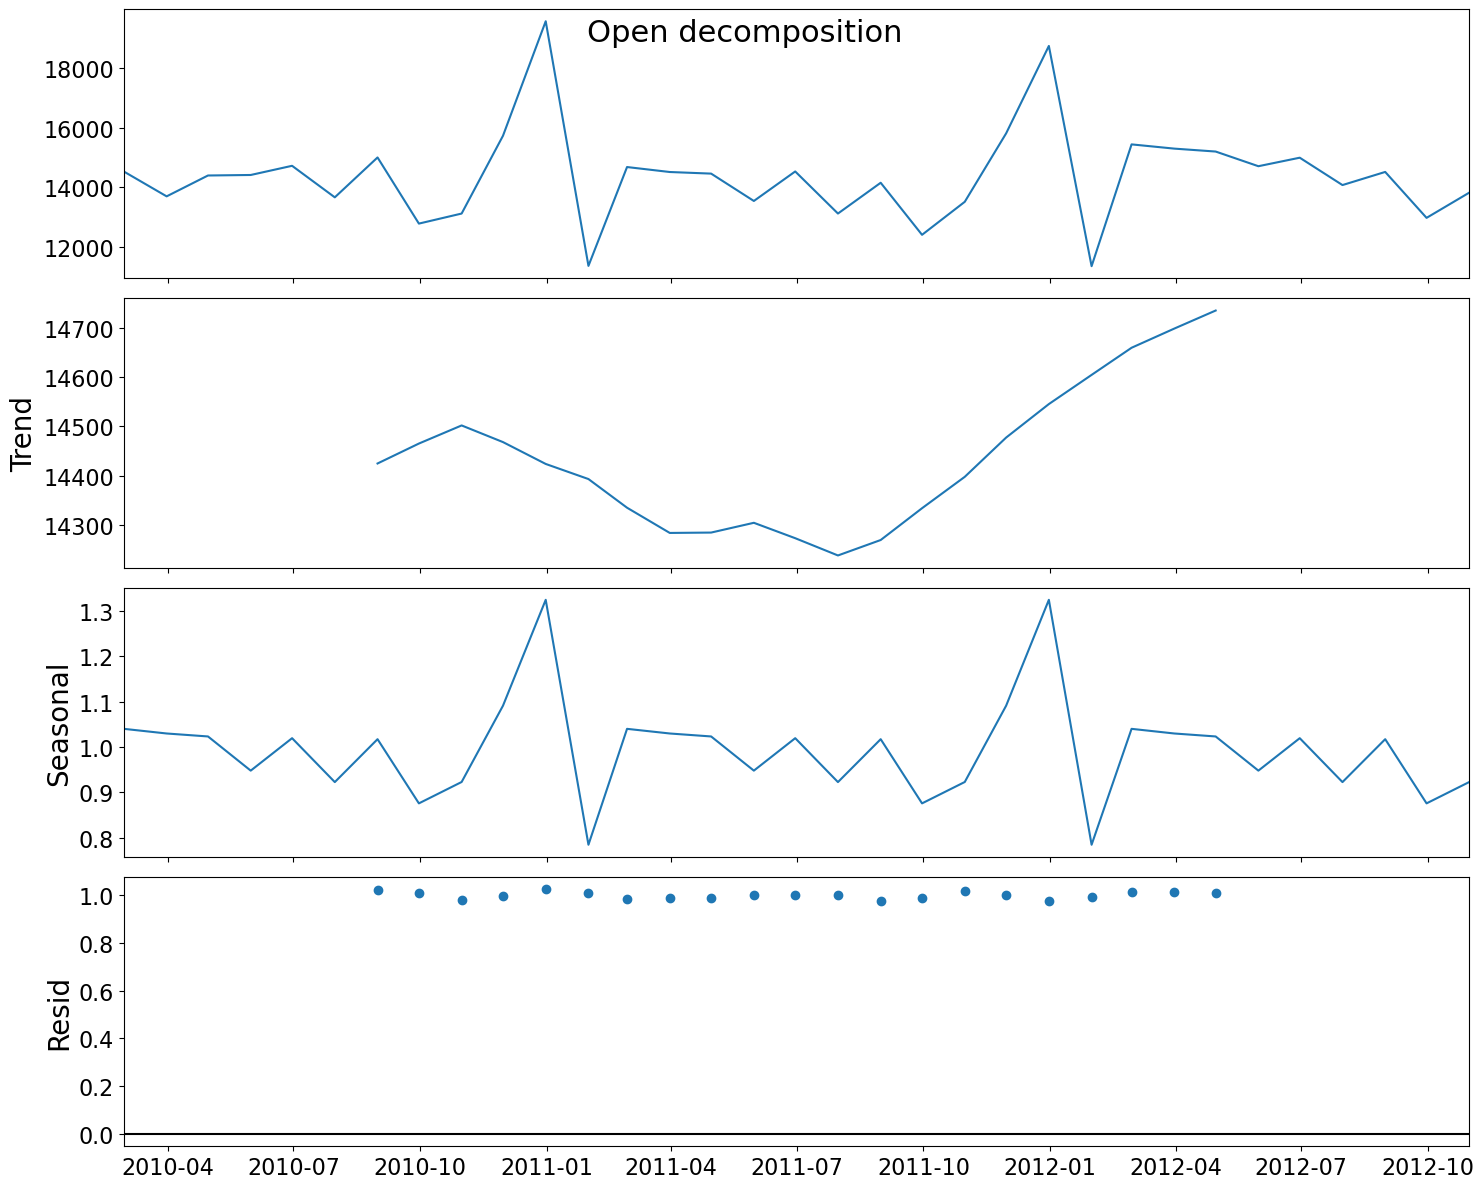

In [41]:
from pylab import rcParams
import statsmodels.api as sm

# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

# DECOMPOSING TIME SERIES
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', period=12)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)


### Moving Average(MA) 

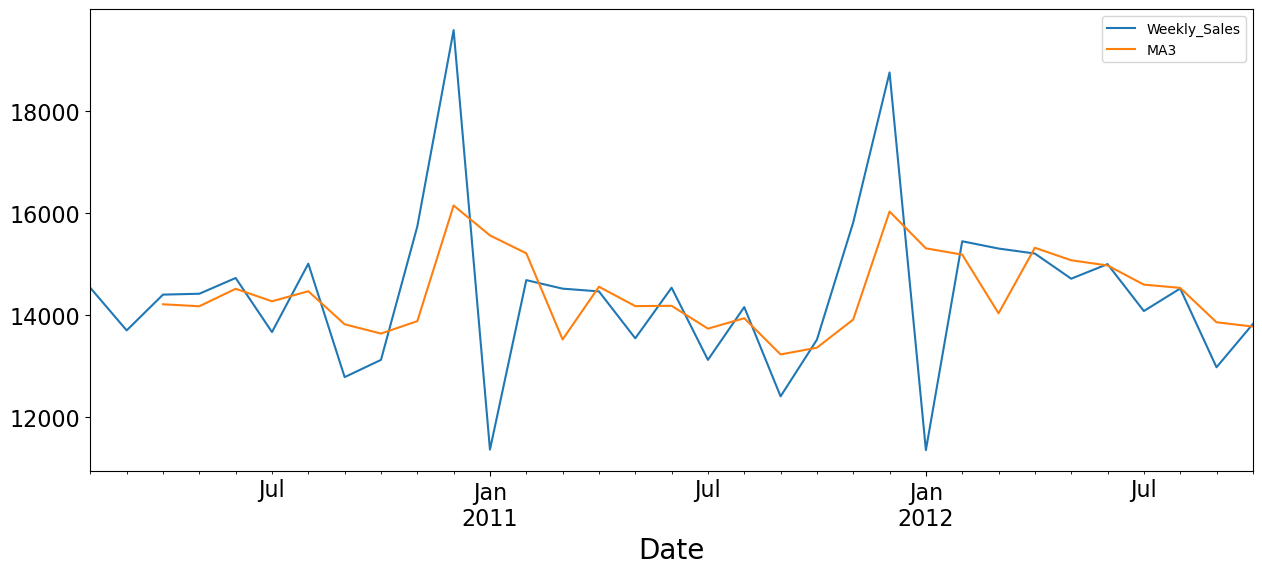

In [42]:
# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean() 
y.plot(figsize=(15,6));

### Exponential Smoothing¶
 

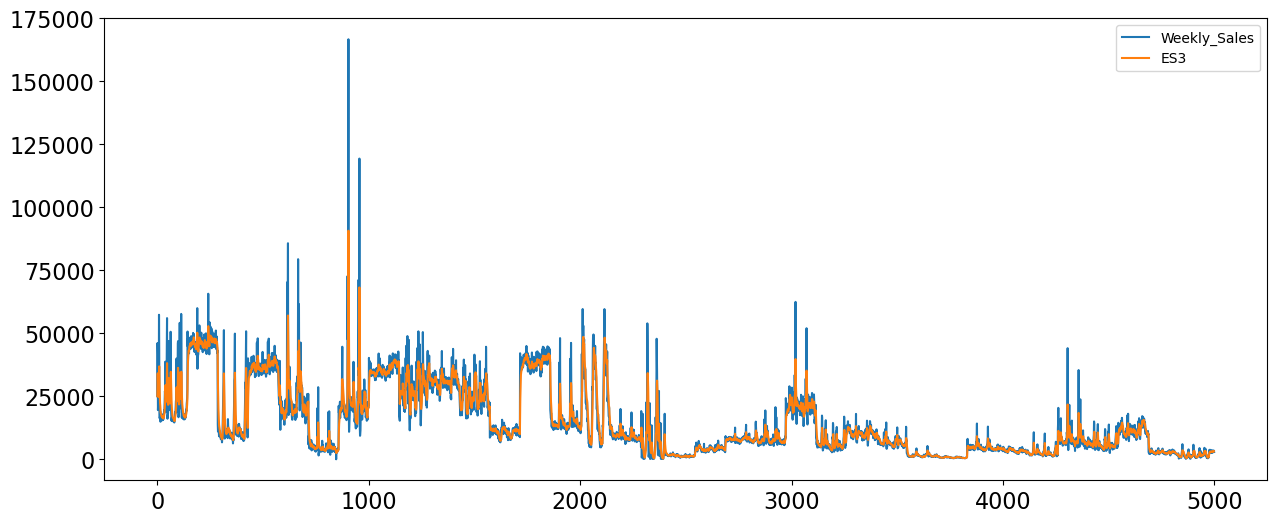

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
# Setting the span value
span = 6
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
tdf['ES3'] = SimpleExpSmoothing(tdf['Weekly_Sales']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
tdf[['Weekly_Sales','ES3']].plot(figsize=(15,6));

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


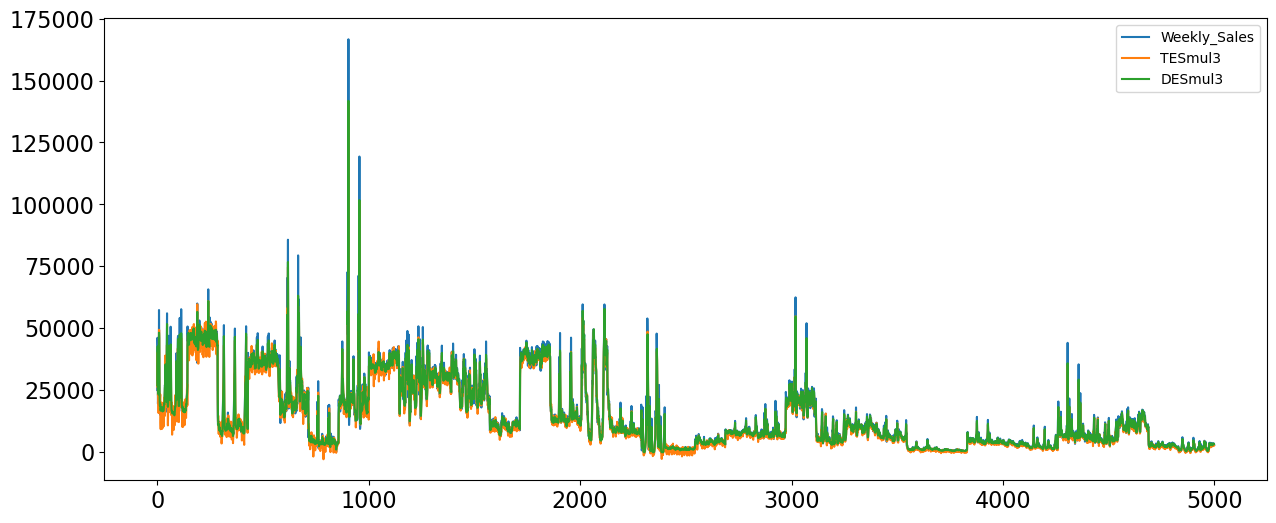

In [44]:
# Plot Double and Triple exponential smoothing
tdf['DESmul3'] = ExponentialSmoothing(tdf['Weekly_Sales'], trend = 'add').fit().fittedvalues.shift(-1)
tdf['TESmul3'] = ExponentialSmoothing(tdf['Weekly_Sales'], trend = 'add', seasonal = 'add', seasonal_periods = 24).fit().fittedvalues.shift(-1)
tdf[['Weekly_Sales', 'TESmul3', 'DESmul3']].plot(figsize = (15,6));

# Time Series Forecasting

In [45]:
train_df = train_df.sort_values(by='Date')

In [46]:
train_df.shape

(5000, 15)

In [47]:
#reset index columns to put date column back inti dataframe
train_df.reset_index(level=0, inplace=True)

In [48]:
train= train_df[0:2500]
test= train_df[2500:]

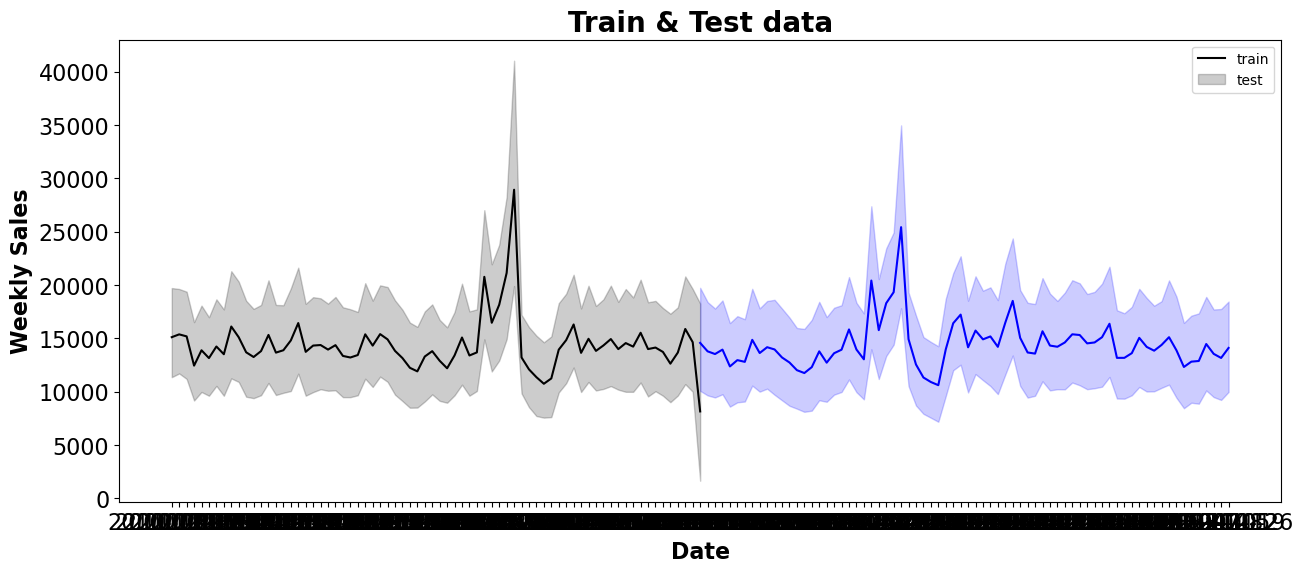

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=train, x='Date', y='Weekly_Sales', color = 'black')
sns.lineplot(data = test,x='Date', y='Weekly_Sales', color = 'blue')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))


## Moving Average Model

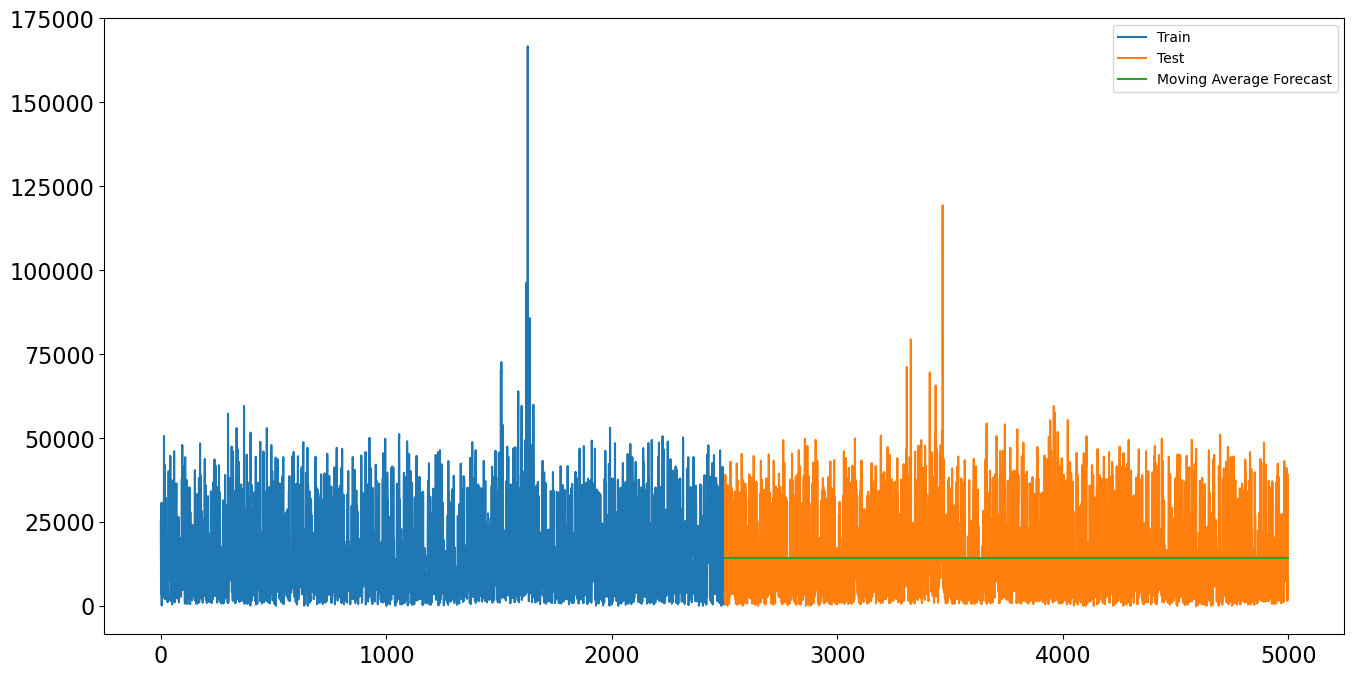

In [50]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Weekly_Sales'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [51]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming test and y_hat_avg.moving_avg_forecast are already defined

# Calculate MAE and RMSE
mae = mean_absolute_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast)
rmse = np.sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 11236.666434666666
RMSE: 13838.661071206252


## ARIMA Model

In [52]:
#We need to plot AF & PCAF first.
train_log = np.log(train['Weekly_Sales'])
test_log = np.log(test['Weekly_Sales'])
train_log_diff = train_log - train_log.shift(1)
train_log = train_log.dropna()
test_log = test_log.dropna()

In [53]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(), nlags=10)
lag_pacf = pacf(train_log_diff.dropna(), nlags=10, method='ols')

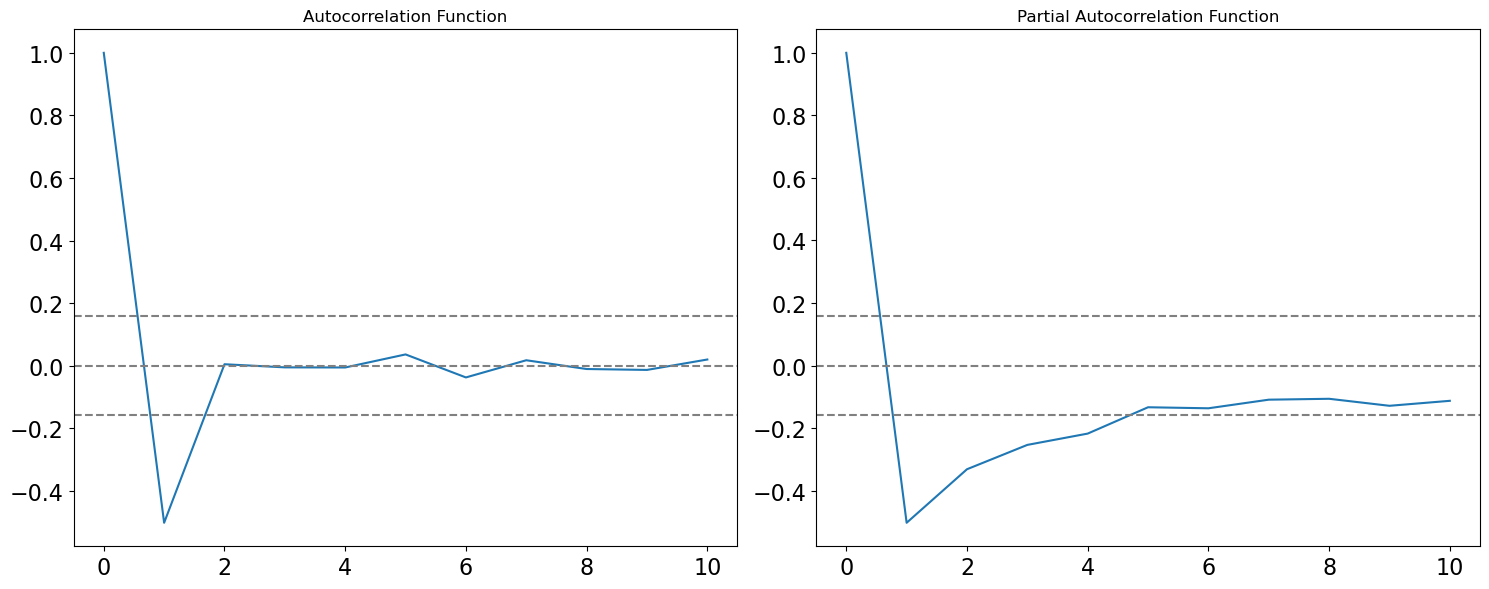

In [54]:
#Plot ACF & PACF : 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

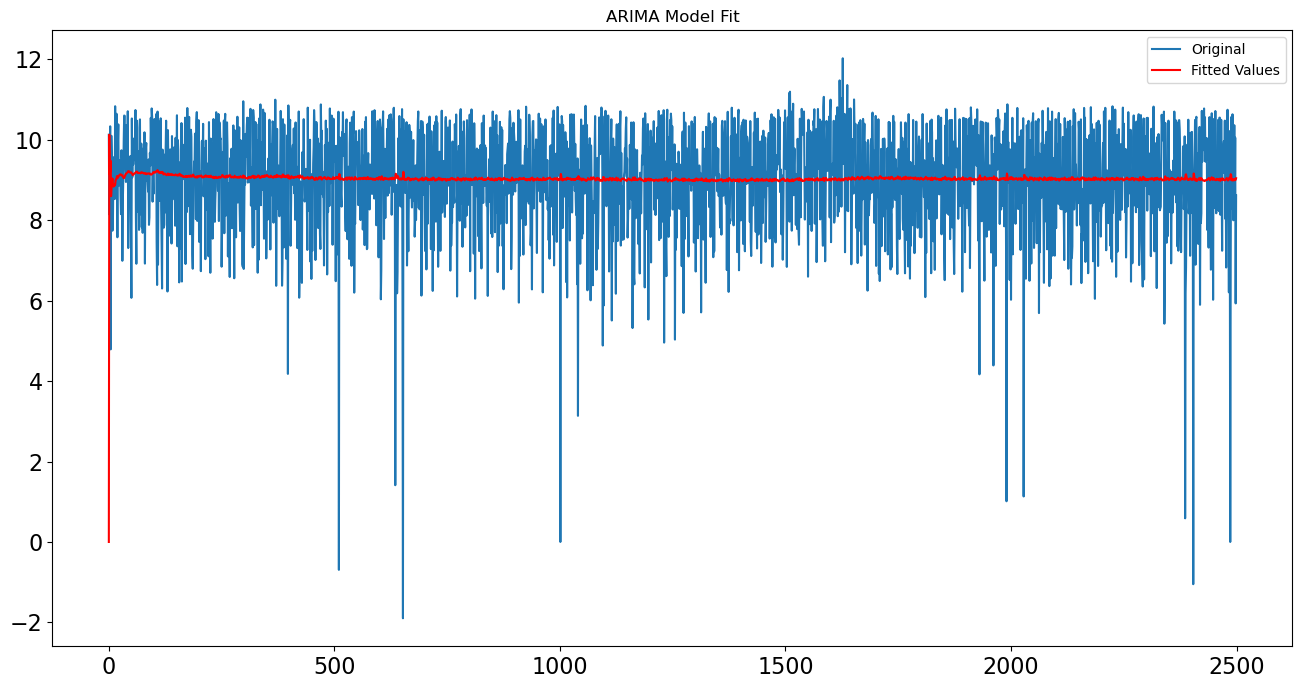

In [55]:
# Optimal values fot ARIMA(p,d,q) model are (1,1,1). Hence plot the ARIMA model using the value (1,1,1)
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_log is already defined and contains the log-transformed training data

# Fit the ARIMA model
model = ARIMA(train_log, order=(2, 1, 1))  
results_ARIMA = model.fit()

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(train_log, label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

In [56]:
# Call the forecast method
forecast_values = results_ARIMA.forecast(steps=300, alpha=0.05)

# Assign the forecasted values
fc = forecast_values

# Print the shape of forecasted values
print(fc.shape)


(300,)


In [57]:
# Call the forecast method
forecast_values = results_ARIMA.forecast(steps=len(test), alpha=0.05)

# Extract forecasted values
if isinstance(forecast_values, tuple):
    fc = forecast_values[0]
else:
    fc = forecast_values

# Report performance
mae_v = mean_absolute_error(test['Weekly_Sales'], fc)
print('MAE:', mae_v)
rmse_v = np.sqrt(mean_squared_error(test['Weekly_Sales'], fc))
print('RMSE:', rmse_v)



MAE: 14411.43089894053
RMSE: 19978.857621300867


### Model Evaluation¶
Comparing all the models:

Here, we are choosing Mean Absolute Error as main for evaluation.

In [58]:
models = pd.DataFrame({
    'Model': [ 'Moving Average', "ARIMA"],
    'MAE': [
        mae,  
        mae_v]


       })
print("--------TIME FORECASTING MODELS---------")
models.sort_values(by='MAE', ascending=True)

--------TIME FORECASTING MODELS---------


,Model,MAE
0,Moving Average,11236.666435
1,ARIMA,14411.430899


#### For this dataset, Moving Average model is best suited for Forecasting.¶
